# Imports

In [1]:
import os
import pandas as pd
import numpy as np

from orbit_generation.visualize import visualize_static_orbits, plot_mean_distance_by_group_column
from orbit_generation.experiment import read_json_to_dataframe, plot_corr_matrix, create_experiment_image_grid

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
experiments_folder = r'../experiments'
experiments_file = r'../experiments/experiments.json'
results_folder = r'../experiments/results'
generated_orbits_path = os.path.join(results_folder, 'generated_orbits')
refined_orbits_path = os.path.join(results_folder, 'refined_orbits')
latent_space_with_distributions_path = os.path.join(results_folder, 'latent_space_label_distribution')
metrics_corr_matrix_path = os.path.join(results_folder, 'metrics_corr_matrix')

# Experiment Metrics

In [4]:
df=read_json_to_dataframe(experiments_file)
df.shape

(35, 28)

In [5]:
# Check for columns with NaN values
nan_columns = df.isna().sum()
num_nan_columns = (nan_columns > 0).sum()

# print(nan_columns[nan_columns > 0])

# Drop columns with NaN values
df = df.dropna(axis=0)
df.shape

(20, 28)

In [6]:
# Add the parameters as columns
parameters_df = df['parameters'].apply(pd.Series)
df = pd.concat([df, parameters_df], axis=1)
df = df.drop(columns=['parameters'])
df = df.drop(columns=['id'])
df.head()

,id_experiment,discarded_family_ids,discarded_families,val_total_loss,val_reconstruction_loss,val_kl_loss,train_total_loss,train_reconstruction_loss,train_kl_loss,family_ari,family_nmi,family_homogeneity,family_completeness,family_v-measure,family_fmi,family_purity,family_silhouette_score,family_jaccard,family_accuracy,position_error,velocity_error,energy_error,disorder_metric,correct_order,inversions,kendall_tau_distance,data_used,families_to_discard,seq_len,feature_dim,epochs,val_split,batch_size,lr,model_name,latent_dim,model_kwargs,max_iter_convergence,input_seq_len_convergence,samples_to_generate,distance_metric
0,1,[],[],2.314120,1.257023,1.057096,2.287191,1.203018,1.084175,0.437865,0.760633,0.736176,0.786772,0.760633,0.467644,0.636991,0.412653,0.054309,0.586030,0.240164,0.390066,1.091467,239.106667,73.950000,158.093333,0.063876,EM_N_fix_1500,0,100,7,100,0.05,32,0.001,vae_conv5_legit,2,"{'dropout_rate': 0.2, 'beta': 0.2}",50,1,100,euclidean
1,2,[],[],3.621131,1.564807,2.056325,3.819442,1.688120,2.131319,0.422034,0.753795,0.727629,0.781914,0.753795,0.455652,0.623853,0.470571,0.034327,0.556480,0.203368,0.364162,1.272723,207.420000,75.120000,135.860000,0.054893,EM_N_fix_1500,0,100,7,100,0.05,32,0.001,vae_conv5_legit,2,"{'dropout_rate': 0.2, 'beta': 0.5}",50,1,100,euclidean
2,3,[],[],6.278173,2.787792,3.490380,5.854217,2.198980,3.655234,0.369939,0.722634,0.694543,0.753093,0.722634,0.405889,0.582845,0.494183,0.003379,0.518325,0.219762,0.385286,1.525684,184.226667,74.483333,119.296667,0.048201,EM_N_fix_1500,0,100,7,100,0.05,32,0.001,vae_conv5_legit,2,"{'dropout_rate': 0.2, 'beta': 1}",50,1,100,euclidean
3,4,[],[],9.564927,4.674734,4.890194,8.912427,4.131489,4.780936,0.350587,0.691033,0.662920,0.721636,0.691033,0.387316,0.544580,0.454012,0.038707,0.488819,0.245518,0.406642,0.886076,274.813333,71.363333,183.666667,0.074209,EM_N_fix_1500,0,100,7,100,0.05,32,0.001,vae_conv5_legit,2,"{'dropout_rate': 0.2, 'beta': 1.5}",50,1,100,euclidean
4,5,[],[],10.164602,10.148395,0.016208,0.699218,0.669898,0.029321,0.313713,0.725831,0.674339,0.785836,0.725831,0.377012,0.534693,0.376295,0.011596,0.440291,0.204246,0.335176,0.850977,200.093333,75.670000,131.690000,0.053208,EM_N_fix_1500,0,100,7,100,0.05,32,0.001,vae_conv5_legit,2,"{'dropout_rate': 0.2, 'beta': 0.001}",50,1,100,euclidean


## Feature Correlation

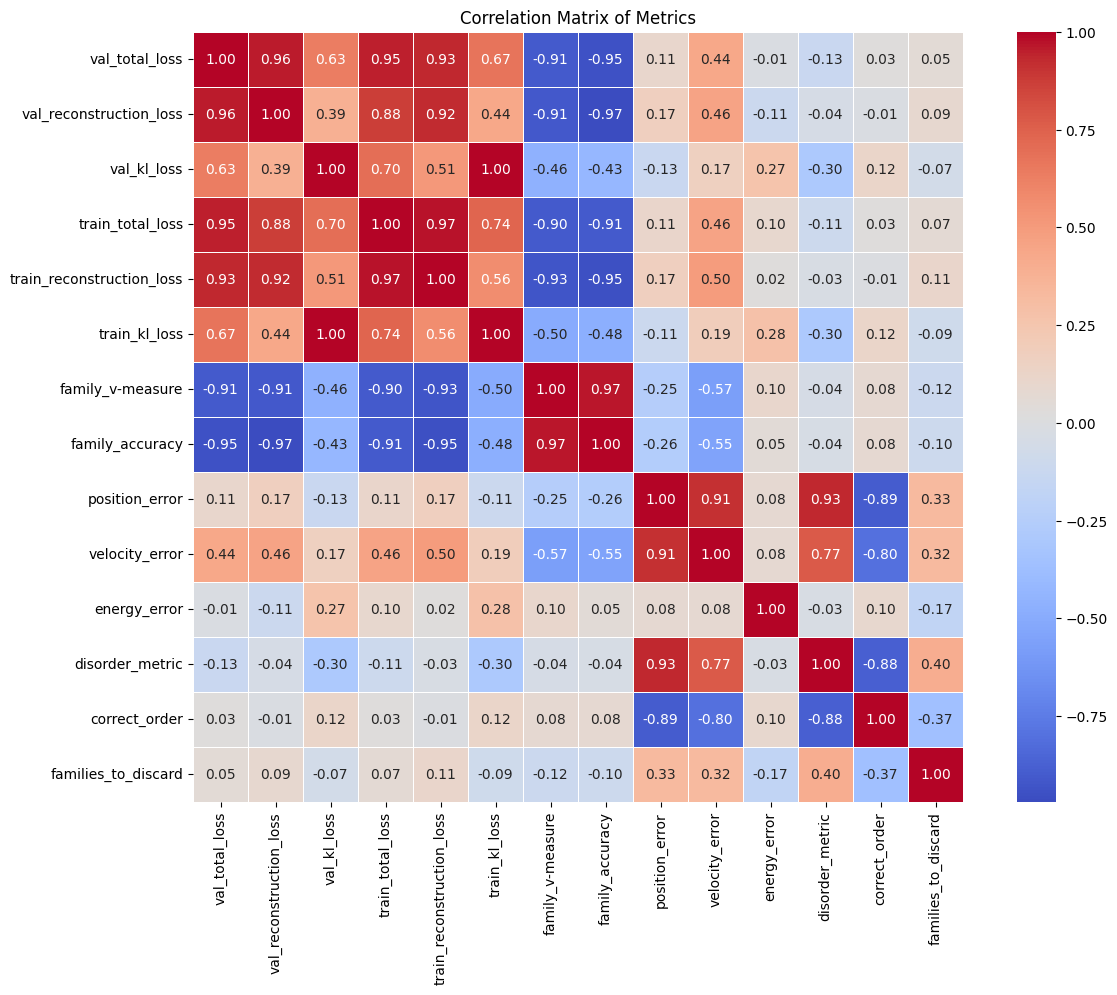

In [7]:
static_parameters = ['id_experiment', 'seq_len','feature_dim', 'val_split', 'batch_size', 'lr', 'epochs', 'input_seq_len_convergence', 'samples_to_generate','latent_dim', 'max_iter_convergence']
repeated_metrics = ['family_ari', 'family_nmi', 'family_homogeneity', 'family_completeness', 'family_fmi', 'family_purity', 'family_silhouette_score', 'family_jaccard', 'inversions', 'kendall_tau_distance']
numeric_columns = df.select_dtypes(include=[np.number]).columns
columns_to_show = [col for col in numeric_columns if col not in static_parameters + repeated_metrics]
plot_corr_matrix(df[columns_to_show])

## Parameter Consequences

In [8]:
initial_df = df
df = df[columns_to_show]

### Families Discarded

In [9]:
df['families_to_discard'].value_counts()

families_to_discard
0    13
5     7
Name: count, dtype: int64

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from typing import Dict, Any, List

def summarize_and_test(df: pd.DataFrame, group_col: str, features: List[str] = None, visualize: bool = True, figsize: tuple = (10, 40)) -> Dict[str, Any]:
    
    def group_and_summarize(df: pd.DataFrame, group_col: str, features: List[str]) -> Dict[str, Dict[str, Any]]:
        summary_stats = {}
        groups = df[group_col].unique()
        for group in groups:
            group_data = df[df[group_col] == group]
            mean_values = group_data[features].mean()
            std_dev = group_data[features].std()
            summary_stats[group] = {'mean': mean_values, 'std_dev': std_dev}
        return summary_stats

    def perform_ttest(df: pd.DataFrame, group_col: str, features: List[str]) -> Dict[str, Dict[str, Any]]:
        groups = df[group_col].unique()
        if len(groups) != 2:
            raise ValueError("T-test requires exactly two groups")
        
        ttest_results = {}
        for feature in features:
            group1_data = df[df[group_col] == groups[0]][feature]
            group2_data = df[df[group_col] == groups[1]][feature]
            t_stat, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')
            ttest_results[feature] = {'t_stat': t_stat, 'p_value': p_value}
        return ttest_results

    def visualize_summary(summary_stats: dict, ttest_results: dict, figsize: tuple):
        groups = list(summary_stats.keys())
        features = list(next(iter(summary_stats.values()))['mean'].index)

        fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=figsize)
        if len(features) == 1:
            axes = [axes]
        fig.tight_layout(pad=5.0)

        for i, feature in enumerate(features):
            means = [summary_stats[group]['mean'][feature] for group in groups]
            std_devs = [summary_stats[group]['std_dev'][feature] for group in groups]

            axes[i].bar(groups, means, yerr=std_devs, capsize=5, color=['skyblue', 'salmon'])
            axes[i].set_title(f'Feature: {feature}')
            axes[i].set_ylabel('Value')
            axes[i].set_ylim(0, max(means) + 1.5 * max(std_devs))

            p_value = ttest_results[feature]['p_value']
            significance = '*' if p_value < 0.05 else 'ns'
            axes[i].text(0.5, max(means) + 0.1 * max(means), f'p={p_value:.3f}, {significance}', ha='center')

        plt.xlabel('Groups')
        plt.suptitle('Mean and Standard Deviation by Grouping Column', fontsize=16)
        plt.show()

    # If features are not specified, use all columns except the grouping column
    if features is None:
        features = [col for col in df.columns if col != group_col]

    # Ensure all specified features exist in the DataFrame
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        raise KeyError(f"The following features are not in the DataFrame: {missing_features}")

    summary_stats = group_and_summarize(df, group_col, features)
    ttest_results = perform_ttest(df, group_col, features)
    
    if visualize:
        visualize_summary(summary_stats, ttest_results, figsize)
    
    return {
        'summary_stats': summary_stats,
        'ttest_results': ttest_results
    }

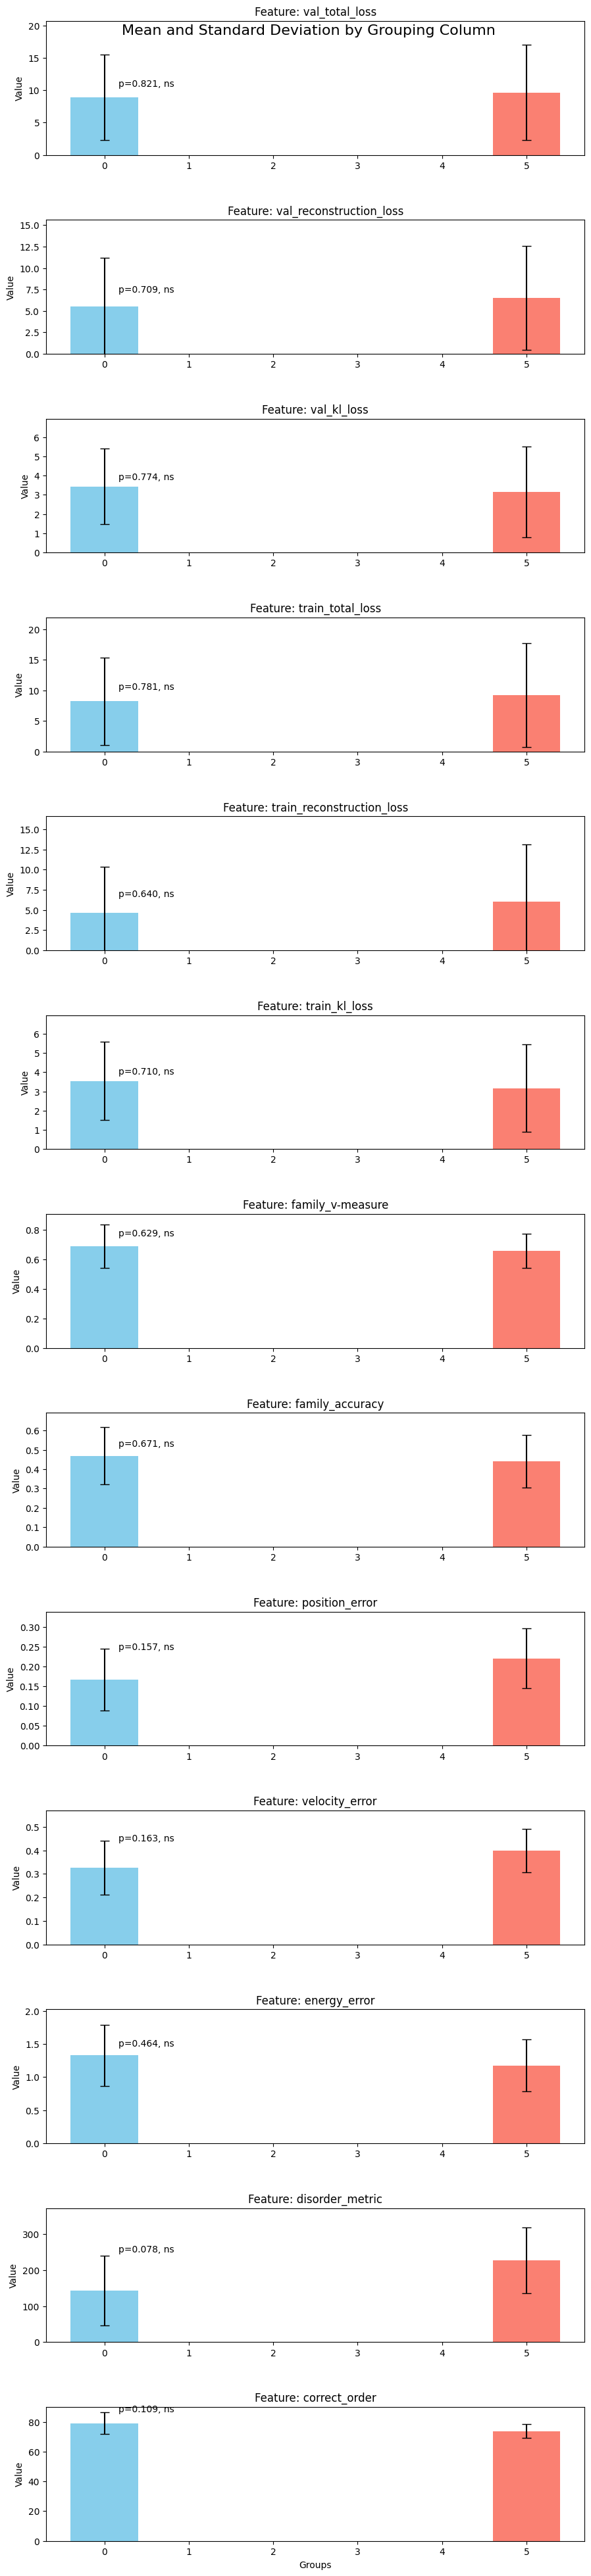

In [19]:
results=summarize_and_test(df, 'families_to_discard')

### Model

In [21]:
df['model'].value_counts()

KeyError: 'model'

In [20]:
results=summarize_and_test(df, 'model')

KeyError: 'model'

### Latent Dimensions

### Beta

# Orbit Metrics

In [ ]:
import os
import pandas as pd
import re

def concatenate_csvs_from_experiment_folder(experiments_folder, file_suffix):
    dataframes = []
    
    for folder in os.listdir(experiments_folder):
        if folder.startswith('experiment_') and os.path.isdir(os.path.join(experiments_folder, folder)):
            # Extract the experiment number using regex
            match = re.search(r'experiment_(\d+)', folder)
            if match:
                experiment_id = match.group(1)
                csv_file_path = os.path.join(experiments_folder, folder, f'exp{experiment_id}_{file_suffix}.csv')
                
                if os.path.isfile(csv_file_path):
                    # Load the CSV file into a DataFrame
                    df = pd.read_csv(csv_file_path)
                    
                    # Add a column to identify the experiment
                    df['experiment_id'] = experiment_id
                    
                    dataframes.append(df)
    
    # Concatenate all DataFrames along rows
    if dataframes:
        return pd.concat(dataframes, axis=0, ignore_index=True)
    else:
        return pd.DataFrame() # return an empty DataFrame if no valid files are found

In [ ]:
generation_df = concatenate_csvs_from_experiment_folder(experiments_folder,'generation_df')
generation_df.shape

(2400, 10)

In [ ]:
generation_df['experiment_id'].value_counts()

experiment_id
20    300
19    300
5     300
2     300
7     300
16    300
17    300
6     300
Name: count, dtype: int64

In [ ]:
generation_df.head()

,position_error,velocity_error,energy_error,disorder_metric,correct_order,inversions,kendall_tau_distance,nearest_orbit,nearest_orbit_distance,experiment_id
0,0.039023,0.145125,0.598114,8.0,95.0,4.0,0.001618,41654,2.451330,20
1,0.050340,0.098792,0.208008,38.0,85.0,19.0,0.007686,24821,4.793100,20
2,0.016583,0.053681,0.055795,60.0,76.0,31.0,0.012551,11599,1.715715,20
3,0.084174,0.102080,0.721510,12.0,93.0,7.0,0.002832,35734,2.075617,20
4,0.059803,0.095766,0.137650,30.0,88.0,16.0,0.006472,30829,3.383785,20


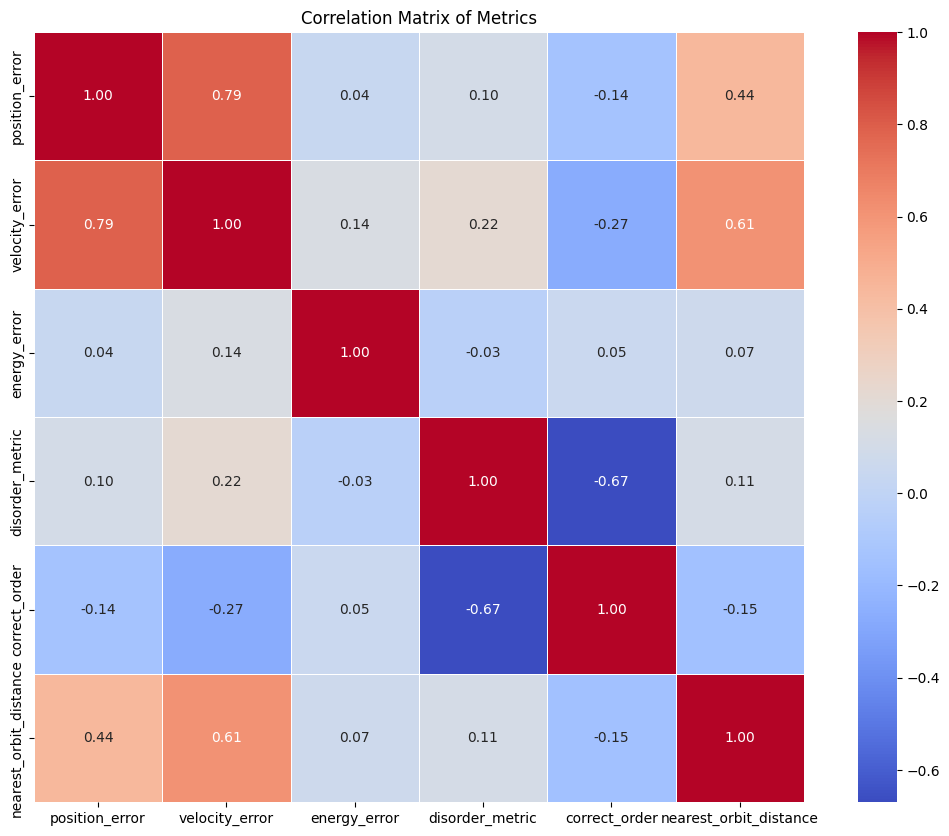

In [ ]:
columns_to_drop_generation = ['experiment_id','nearest_orbit', 'inversions', 'kendall_tau_distance']
plot_corr_matrix(generation_df.drop(columns=columns_to_drop_generation))

In [ ]:
refined_orbits_df = concatenate_csvs_from_experiment_folder(experiments_folder,'refined_orbits_df')
refined_orbits_df.shape

(1216, 44)

In [ ]:
refined_orbits_df = refined_orbits_df.dropna(axis=0)
refined_orbits_df.shape

(1216, 44)

In [ ]:
refined_orbits_df.head()

,id,old_period,period,iterations_convergence,error,initial_pos_x0,initial_pos_y0,initial_pos_z0,initial_vel_x0,initial_vel_y0,initial_vel_z0,final_pos_x0,final_pos_y0,final_pos_z0,final_vel_x0,final_vel_y0,final_vel_z0,disorder_metric,correct_order,inversions,kendall_tau_distance,propagated_position_error,propagated_velocity_error,propagated_energy_error,latent_distance_to_generation,calculated_jacobi,period_distance_with_generation,feature_closest_orbit,feature_distance_from_closest_orbit,nearest_orbit,nearest_orbit_distance,distance_from_generation,centroid_distance,feature_centroid_distance,closest_family_centroid,closest_family_centroid_distance,closest_family_feature_centroid,closest_family_feature_centroid_distance,initial_conditions_distance,closest_family_full_centroid,closest_family_full_centroid_distance,family_of_feature_closest_orbit,family_of_closest_orbit,experiment_id
0,0,11.703933,12.357871,10,7.152633e-10,0.591470,0.031069,-0.098176,0.036233,1.000544,-0.013237,0.521137,-0.040531,-1.504163e-13,0.032831,1.023015,4.429204e-13,10.0,94.0,5.0,0.002020,1.243014e-11,3.025524e-11,1.177680e-10,0.013258,2.983566,0.653938,41642,0.000896,41647,1.567599,2.387848,0.841099,5.137357,36,0.024818,36,0.261085,0.142841,36,0.024818,39.0,39.0,20
1,1,5.347148,6.289978,8,1.124118e-10,0.694371,0.410032,0.255259,-0.298289,-0.090342,0.725189,0.521621,0.462451,3.546220e-01,-0.342943,-0.267807,8.936788e-01,22.0,89.0,11.0,0.004444,2.853391e-12,7.224060e-12,4.038831e-11,0.108415,2.042545,0.942830,24799,0.000527,24836,4.199245,2.950673,1.525647,1.028908,7,0.478359,29,0.005889,0.323017,7,0.478359,22.0,22.0,20
2,4,6.501299,6.299366,13,3.299068e-11,0.679246,-0.410412,0.280681,0.089587,-0.650120,-0.884761,0.698879,-0.597143,3.776740e-01,-0.101020,-0.659098,-8.642169e-01,38.0,85.0,21.0,0.008485,1.426399e-12,2.809536e-12,2.433970e-12,0.095870,1.668356,0.201933,30932,0.001194,30846,3.349759,2.637535,2.045666,1.204643,26,0.528918,18,0.159146,0.285473,26,0.528918,29.0,29.0,20
3,7,6.185820,4.888628,9,8.322698e-13,0.777826,-0.053229,-0.076891,0.016727,1.582441,-0.038132,0.697347,0.016547,1.372986e-14,0.006547,0.698449,-2.527150e-13,246.0,61.0,172.0,0.069495,2.064911e-12,3.897801e-12,1.895723e-13,0.296321,2.878101,1.297193,28498,0.004067,5399,1.800536,5.288500,0.363951,2.411746,6,0.051784,4,0.390120,0.894571,6,0.051784,26.0,5.0,20
4,10,11.237919,12.363278,23,1.168893e-10,0.977119,-0.095046,-0.096719,0.046247,1.118948,-0.060200,0.741859,-1.145952,-1.021998e-11,-0.528460,-0.056959,4.988532e-12,192.0,88.0,121.0,0.048889,7.737612e-12,6.485309e-12,4.431840e-12,0.149730,3.054045,1.125359,41647,0.069585,35773,9.075386,8.160660,1.386316,5.151148,25,0.525475,36,0.295398,1.698757,25,0.525475,39.0,33.0,20


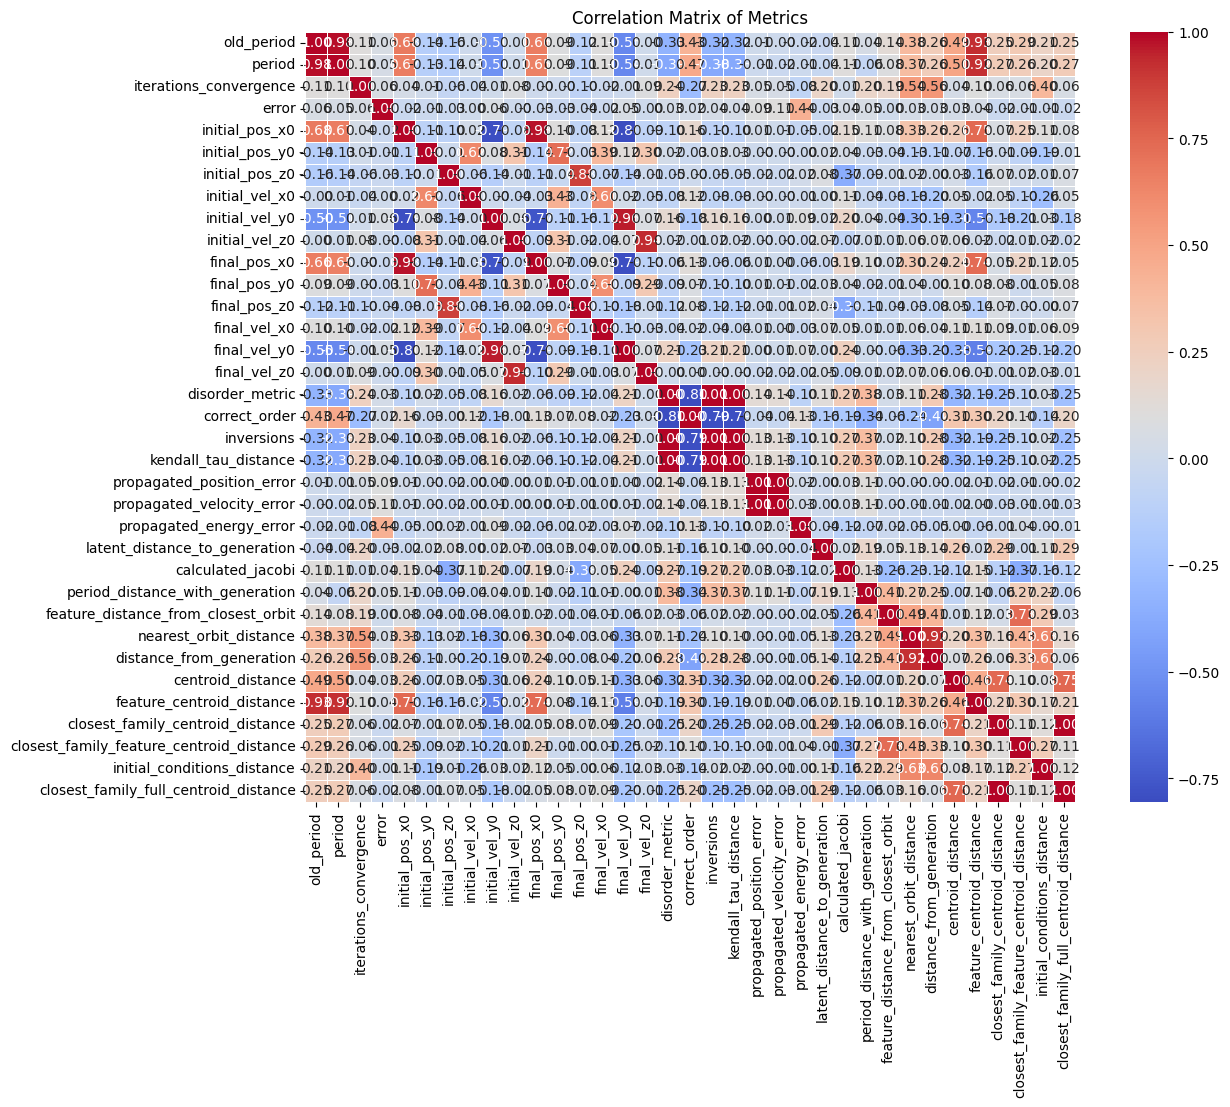

In [ ]:
not_to_show_columns = ['id', 'experiment_id','nearest_orbit', 'feature_closest_orbit', 'nearest_orbit', 'closest_family_centroid', 'closest_family_feature_centroid', 'closest_family_full_centroid', 'family_of_feature_closest_orbit', 'family_of_closest_orbit']
plot_corr_matrix(refined_orbits_df.drop(columns=not_to_show_columns))

# Plots

## Generated Orbits

In [ ]:
# create_experiment_image_grid(experiments_folder, 'all_generated_data.png', font_size=100, crop_length=100, save_path=generated_orbits_path)